In [1]:
# !pip install git+https://github.com/LBNL-ETA/DOPER.git
# !pip install pygrib

In [2]:
import io
import os
import json
import time
import numpy as np
import pandas as pd
import datetime as dtm

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

from doper.data.weatherForecast import get_hrrr_forecast
from doper.data.weatherForecast import get_default_config, weather_forecaster

### Location

In [3]:
# Downtown Berkeley
# lat = 37.8715
# lon = -122.2730

# Camp Parks
# lat = 37.716
# lon = -121.909

# 71T
lat = 37.879
lon = -122.250

### Test Module

In [4]:
# get config
config = get_default_config()
config['lat'] = lat
config['lon'] = lon

# initialize
forecaster = weather_forecaster()
forecaster.input['config'] = config

# get forecast
msg = forecaster.compute(now=None)
res = pd.read_json(io.StringIO(forecaster.output['output-data']))

In [5]:
msg

'Done.'

In [6]:
# res

### Test over loop

In [7]:
res_name = f'NOAA_fcs_{dtm.datetime.now().strftime("%Y%m%dT%H%M%S")}.json'

res_all = []
while True:

    # get forecast
    msg = forecaster.compute(now=None)
    res = pd.read_json(io.StringIO(forecaster.output['output-data']))

    # store forecast
    if msg == 'Done.':
        res_all.append(res.copy(deep=True).to_json())
        with open(res_name, 'w') as f:
            f.write(json.dumps(res_all))
    else:
        print(dtm.datetime.now())
        print(msg)

    # sleep
    time.sleep(1*60*60)

KeyboardInterrupt: 

### Print Forecast vs. real

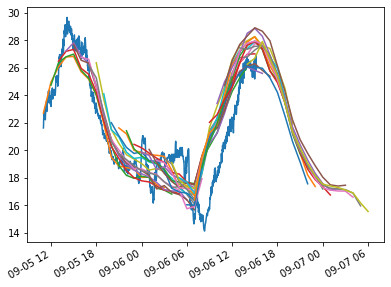

In [22]:
# forecast data
with open('NOAA_fcs_20240905T185024.json') as f:
    res_all = json.loads(f.read())
    for ir, _ in enumerate(res_all):
        res = pd.read_json(io.StringIO(res_all[ir]))
        res.index = pd.to_datetime(res.index)
        res_all[ir] = res

# 71T data
st = res_all[0].index[0]
df = pd.read_csv('71t_data_20240906.csv')
df.index = pd.to_datetime(df['Human-Readable Time (UTC)'].values) - pd.DateOffset(hours=7)
df['71T/ Exterior/ Weather/ Temperature'].loc[st:].plot()

for res in res_all:
    res['temp_air'].plot()

plt.show()

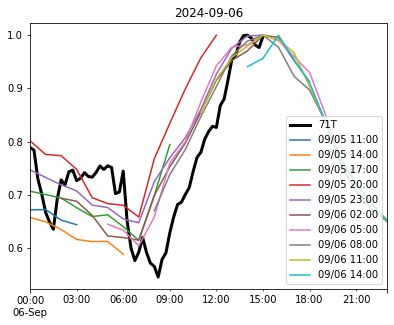

In [29]:
st = '2024-09-06'
tt = df['71T/ Exterior/ Weather/ Temperature'].loc[st].resample('15min').mean()
(tt/tt.max()).plot(color='black', linewidth=3, label='71T')
ttt = [r for r in res_all if pd.to_datetime(st).date() in r.index.date]
for ttti in range(0, len(ttt)+1, 3):
    tt = ttt[ttti]['temp_air']
    tt = (tt/tt.max())
    tt.loc[st].plot(label=ttt[ttti].index[0].strftime('%m/%d %H:%M'))
plt.title(st)
plt.legend()
plt.show()

### Herbie (not used)

In [ ]:
# !pip install git+https://github.com/blaylockbk/Herbie.git

# needed?
# !pip install GOES
# !pip install git+https://github.com/SciTools/cartopy.git@v0.21.1

# from herbie import Herbie

# # Herbie object for the HRRR model 6-hr surface forecast product
# H = Herbie(
#   '2021-01-01 12:00',
#   model='hrrr',
#   product='sfc',
#   fxx=6
# )

# # Look at file contents
# H.inventory()

# # Download the full GRIB2 file
# H.download()

# # Download a subset, like all fields at 500 mb
# H.download(":500 mb")

# # Read subset with xarray, like 2-m temperature.
# H.xarray("TMP:2 m")